# 미분

## finite difference

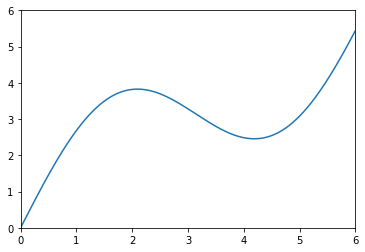

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

xdata = np.arange(0,8,0.01)
def yfunc(x):
    return 2*np.sin(x)+x

plt.xlim(0,6);plt.ylim(0,6)
plt.plot(xdata,yfunc(xdata));

$\begin{align} \frac{d} {dx}[ 2 \sin(x) +x]= 2 \cos(x) +1 \end{align}$

In [5]:
def trapez(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

def for_diff(f,x,dx):
    return (f(x+dx)-f(x))/dx
def back_diff(f,x,dx):
    return (f(x)-f(x-dx))/dx
def cen_diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

In [19]:
dx=0.1
xdata=np.arange(0,8,0.01)
diff1=[for_diff(yfunc,i,dx) for i in xdata]
diff2=[back_diff(yfunc,i,dx) for i in xdata]
diff3=[cen_diff(yfunc,i,dx) for i in xdata]

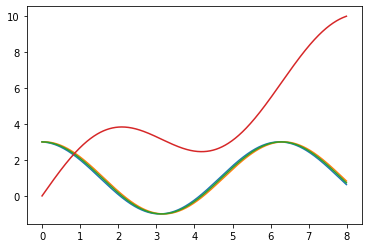

In [20]:
plt.plot(xdata,diff1)
plt.plot(xdata,diff2)
plt.plot(xdata,diff3)
plt.plot(xdata,yfunc(xdata));

## second derivatives

$\begin{align} f''(x) &\approx \frac{f'(x+dx/2)-f'(x-dx/2)}{dx} \approx \frac{1}{dx} \left\{ [f(x+dx)-f(x)]/dx - [f(x)-f(x-dx)]/dx \right\} \\ &=\frac{1}{dx^2}[ f(x+dx) + f(x-dx) - 2 f(x)] \end{align}$

In [22]:
def sec_diff(f,x,dx):
    return (f(x+dx)+f(x-dx)-2*f(x))/dx**2

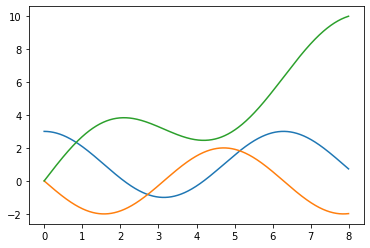

In [25]:
dx=0.1
xdata=np.arange(0,8,0.01)
diff3=[cen_diff(yfunc,i,dx) for i in xdata]
sdiff=[sec_diff(yfunc,i,dx) for i in xdata]

plt.plot(xdata,diff3)
plt.plot(xdata,sdiff)
plt.plot(xdata,yfunc(xdata));

## Derivatives, given fixed samples

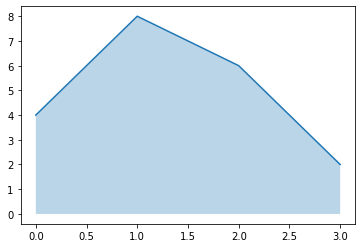

In [28]:
xsamples = [0,1,2,3]
ysamples = [4,8,6,2]
plt.plot(xsamples,ysamples,'-')
plt.fill_between(xsamples,ysamples,alpha=0.3);

In [35]:
def cen_diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx
xcenter = [0.5*(xsamples[i]+xsamples[i+1]) for i in range(0,len(xsamples)-1,1)]
ydiff = [(ysamples[i+1]-ysamples[i])/(xsamples[i+1]-xsamples[i]) for i in range(0,len(xsamples)-1,1)]

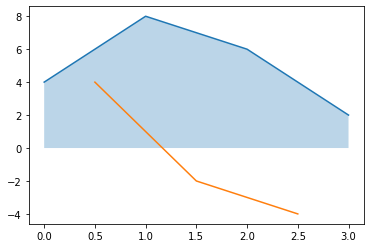

In [37]:
plt.plot(xsamples,ysamples,'-')
plt.fill_between(xsamples,ysamples,alpha=0.3);
plt.plot(xcenter,ydiff)

## Derivatives of noisy data
 It is not trivial.  
1. increase $dx$
2. do fitting
3. smooth the data